<a href="https://colab.research.google.com/github/nisanuro/CNG562-Assignment-1/blob/master/CNG562_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNG 562 - Assignment #1**

Linear Regression vs Logistic Regression using Iris Dataset\
Comparing:
*   Random 1-Hold Out
*   5-Fold
*   10-Fold
*   Strafied 1-Hold Out

\
Nisa Nur Odabaş\
Kaan Taha Köken

---



In [0]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics, datasets, preprocessing
from sklearn.metrics import roc_curve, auc
%matplotlib inline

**K-Fold method**

In [0]:
def kFold(foldNumber, X_train, Y_train):

  kf = KFold(n_splits=foldNumber, shuffle=False)  

  logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
  linReg = LinearRegression()  

  cv_result_log = cross_val_score(logReg, X_train, Y_train, cv=kf, scoring='accuracy')
  cv_result_lin = cross_val_score(linReg, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')

  print(str(foldNumber) + "Fold")
  print("Logistic Regression Accuracy: ", cv_result_log.mean())
  print("Linear Regression Accuracy: ", 1 + cv_result_lin.mean())

**Random 1-Hold Out method**

In [0]:
def randomOneHoldout(X_train, Y_train):

  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)
  
  logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
  linReg = LinearRegression()

  logReg.fit(x_train, y_train)
  linReg.fit(x_train, y_train)

  y_pred_log = logReg.predict(x_test)
  y_pred_lin = linReg.predict(x_test)
  
  print("Random One Hold Out")
  print("Logistic Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_log))
  print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_lin))

**Stratified 1-Hold Out method**

In [0]:
def stratifiedOneHoldout(X_train, Y_train):
  
  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=1, stratify=Y_train)
  
  logReg = LogisticRegression(solver='liblinear', multi_class='ovr')
  linReg = LinearRegression()

  logReg.fit(x_train, y_train)
  linReg.fit(x_train, y_train)

  y_pred_log = logReg.predict(x_test)
  y_pred_lin = linReg.predict(x_test)
  
  print("Stratified")
  print("Logistic Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_log))
  print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, y_pred_lin))

**Displaying accuracies for all validation methods**

In [0]:
def displayAccuracy(X, Y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    
    kFold(5, X_train, Y_train)    
    kFold(10, X_train, Y_train)    
    randomOneHoldout(X_train, Y_train)
    stratifiedOneHoldout(X_train, Y_train)

**Round method for linear regression prediction**

In [0]:
def roundPredict(p):
    r = p.copy()
    for i in range(len(r)):
        if r[i] <= 0.5: r[i] = 0
        elif r[i] >= 1.5: r[i] = 2
        else: r[i] = 1
    return r

**Main**

In [119]:
if __name__ == '__main__':

  iris = datasets.load_iris()
  
  X = iris.data
  Y = iris.target
  
  # L1 normalization
  l1_norm = preprocessing.normalize(X, norm="l1")
  # Mean removal
  mean_removal = preprocessing.scale(X)

  '''#mean & standart deviation before mean removal 
  print(X.mean(axis=0))
  print(X.std(axis=0))

  #mean & standart deviation after mean removal 
  print(mean_removal.mean(axis=0))
  print(mean_removal.std(axis=0))'''

  #Displaying result according to each type of methods and regression model
  print("\nRaw: ")
  displayAccuracy(X,Y)
  print("\nL1 Normalization: ")
  displayAccuracy(l1_norm,Y)
  print("\nMean Removal: ")
  displayAccuracy(mean_removal,Y)


Raw: 
5Fold
Logistic Regression Accuracy:  0.9416666666666668
Linear Regression Accuracy:  0.9505573483173648
10Fold
Logistic Regression Accuracy:  0.9333333333333332
Linear Regression Accuracy:  0.9504757453551504
Random One Hold Out
Logistic Regression Accuracy:  0.9583333333333334
Linear Regression Accuracy:  0.9596940114241354
Stratified
Logistic Regression Accuracy:  0.9583333333333334
Linear Regression Accuracy:  0.9613449341091412

L1 Normalization: 
5Fold
Logistic Regression Accuracy:  0.6916666666666667
Linear Regression Accuracy:  0.9249382972717285
10Fold
Logistic Regression Accuracy:  0.6916666666666667
Linear Regression Accuracy:  0.9228036562601725
Random One Hold Out
Logistic Regression Accuracy:  0.75
Linear Regression Accuracy:  0.9311930338541666
Stratified
Logistic Regression Accuracy:  0.7083333333333333
Linear Regression Accuracy:  0.9382756551106771

Mean Removal: 
5Fold
Logistic Regression Accuracy:  0.8916666666666668
Linear Regression Accuracy:  0.950557348317

# **Final**
**Training and Testing using:**
* **Raw data**
* **Stratified 1-Hold Out**
* **Linear Regression**






**Dividing Train and Test sets**

In [0]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

**Training**

In [121]:
  x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=1, stratify=Y_train)
 
  linReg = LinearRegression()
  linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing**

**Finding Errors for Model**\
Splitting dataset into 4.
*   Train
*   Train Dev
*   Dev
*   Test

In [122]:
  trainDev_pred = linReg.predict(x_test)
  rounded_lin = roundPredict(trainDev_pred)
  
  print("Train-Train Dev,   e1:", metrics.mean_squared_error(y_test, trainDev_pred),"\n")
  print("Rounded Stratify One Hold Out - Only train set")
  print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(y_test, trainDev_pred))
  print("Linear Regression R^2 score: ", metrics.r2_score(y_test, trainDev_pred))

  print("\nY_pred_lin     \t       Y_test\trounded")
  for i, (j, k) in sorted(zip(trainDev_pred, zip(y_test, rounded_lin))):
    print(i , "\t" , j, "\t", k)

Train-Train Dev,   e1: 0.0789685015383695 

Rounded Stratify One Hold Out - Only train set
Linear Regression Accuracy:  0.9210314984616305
Linear Regression R^2 score:  0.8815472476924457

Y_pred_lin     	       Y_test	rounded
-0.13338533425244264 	 0 	 0.0
-0.1083659071882706 	 0 	 0.0
-0.06122542437237788 	 0 	 0.0
-0.05329118074897954 	 0 	 0.0
-0.0429126159997677 	 0 	 0.0
-0.0242791109138423 	 0 	 0.0
0.0009096628014323427 	 0 	 0.0
0.8235121047102323 	 1 	 1.0
0.8780486937147116 	 1 	 1.0
1.161330224826963 	 1 	 1.0
1.1870391393881594 	 1 	 1.0
1.2992859080092798 	 1 	 1.0
1.3299274028519623 	 1 	 1.0
1.3879556985627717 	 1 	 1.0
1.3950051665970737 	 2 	 1.0
1.416967768397909 	 2 	 1.0
1.5535486326267118 	 2 	 2.0
1.6638520161866535 	 2 	 2.0
1.6638520161866535 	 2 	 2.0
1.8198963303604019 	 2 	 2.0
2.0112270682746454 	 2 	 2.0


In [0]:
Dev_x, Test_x, Dev_y, Test_y = train_test_split(X_test, Y_test, test_size=0.5, random_state=1, stratify=Y_test)

In [124]:
dev_pred = linReg.predict(Dev_x)
rounded_lin = roundPredict(dev_pred)

print("Train-Dev,   e2", metrics.mean_squared_error(Dev_y, dev_pred),"\n")
print("Rounded Stratify One Hold Out - Test set")
print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(Dev_y, dev_pred))
print("Linear Regression R^2 score: ", metrics.r2_score(Dev_y, dev_pred))

print("\nY_pred_lin     \t      Y_test\trounded")
for i, (j, k) in sorted(zip(dev_pred, zip(Dev_y, rounded_lin))):
    print(i , "\t" , j, "\t", k)

Train-Dev,   e2 0.04154402265621487 

Rounded Stratify One Hold Out - Test set
Linear Regression Accuracy:  0.9584559773437852
Linear Regression R^2 score:  0.938883565454079

Y_pred_lin     	      Y_test	rounded
-0.1451056726255265 	 0 	 0.0
-0.10091460304061714 	 0 	 0.0
-0.04522063580412056 	 0 	 0.0
-0.03300609802608376 	 0 	 0.0
0.0022514364253043984 	 0 	 0.0
0.03221849251171449 	 0 	 0.0
0.03867050514924514 	 0 	 0.0
0.23727904451950455 	 0 	 0.0
0.8134542366743358 	 1 	 1.0
1.107129381276551 	 1 	 1.0
1.1287122995934598 	 1 	 1.0
1.14436334611876 	 1 	 1.0
1.2233068580498874 	 1 	 1.0
1.2550989944649051 	 1 	 1.0
1.369974479603694 	 1 	 1.0
1.5527626257975506 	 2 	 2.0
1.6955036952396758 	 2 	 2.0
1.7030733041199 	 2 	 2.0
1.7195392467634683 	 2 	 2.0
1.8532104797506117 	 2 	 2.0
1.9358037851099639 	 2 	 2.0
2.0041734441998083 	 2 	 2.0


In [125]:
test_pred = linReg.predict(Test_x)
rounded_lin = roundPredict(test_pred)


print("Train-Test,   e3: ", metrics.mean_squared_error(Test_y, test_pred),"\n")
print("Rounded Stratify One Hold Out - Test set")
print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(Test_y, test_pred))
print("Linear Regression R^2 score: ", metrics.r2_score(Test_y, test_pred))

print("\nY_pred_lin     \t      Y_test\trounded")
for i, (j, k) in sorted(zip(test_pred, zip(Test_y, rounded_lin))):
  print(i , "\t" , j, "\t", k)

Train-Test,   e3:  0.05381451146066997 

Rounded Stratify One Hold Out - Test set
Linear Regression Accuracy:  0.94618548853933
Linear Regression R^2 score:  0.9172445448758884

Y_pred_lin     	      Y_test	rounded
-0.09366984691424335 	 0 	 0.0
-0.06334904878487607 	 0 	 0.0
-0.051639603112009214 	 0 	 0.0
-0.037150090859261575 	 0 	 0.0
-0.029215847235863235 	 0 	 0.0
-0.001534658324381044 	 0 	 0.0
0.0894168433635038 	 0 	 0.0
0.841651410391205 	 1 	 1.0
0.9431482428602571 	 1 	 1.0
1.1320305036081524 	 1 	 1.0
1.2178650296226965 	 1 	 1.0
1.2823039805603245 	 1 	 1.0
1.2941689323359389 	 1 	 1.0
1.3312624398161523 	 1 	 1.0
1.3581508852387913 	 1 	 1.0
1.4436785550883753 	 2 	 1.0
1.573519755295974 	 2 	 2.0
1.7337478442922245 	 2 	 2.0
1.738835930676458 	 2 	 2.0
1.7658208954312336 	 2 	 2.0
1.9108808773779289 	 2 	 2.0
1.9344578554455574 	 2 	 2.0
2.130589028360361 	 2 	 2.0


In [126]:
devTest_pred = linReg.predict(X_test)
rounded_lin = roundPredict(devTest_pred)


print("Train-(Dev+Test),   e4: ", metrics.mean_squared_error(Y_test, devTest_pred),"\n")
print("Rounded Stratify One Hold Out - Test set")
print("Linear Regression Accuracy: ", 1 - metrics.mean_squared_error(Y_test, devTest_pred))
print("Linear Regression R^2 score: ", metrics.r2_score(Y_test, devTest_pred))

print("\nY_pred_lin     \t      Y_test\trounded")
for i, (j, k) in sorted(zip(devTest_pred, zip(Y_test, rounded_lin))):
  print(i , "\t" , j, "\t", k)

Train-(Dev+Test),   e4:  0.04781560582293637 

Rounded Stratify One Hold Out - Test set
Linear Regression Accuracy:  0.9521843941770636
Linear Regression R^2 score:  0.9282765912655955

Y_pred_lin     	      Y_test	rounded
-0.1451056726255265 	 0 	 0.0
-0.10091460304061714 	 0 	 0.0
-0.09366984691424335 	 0 	 0.0
-0.06334904878487607 	 0 	 0.0
-0.051639603112009214 	 0 	 0.0
-0.04522063580412056 	 0 	 0.0
-0.037150090859261575 	 0 	 0.0
-0.03300609802608376 	 0 	 0.0
-0.029215847235863235 	 0 	 0.0
-0.001534658324381044 	 0 	 0.0
0.0022514364253043984 	 0 	 0.0
0.03221849251171449 	 0 	 0.0
0.03867050514924514 	 0 	 0.0
0.0894168433635038 	 0 	 0.0
0.23727904451950455 	 0 	 0.0
0.8134542366743358 	 1 	 1.0
0.841651410391205 	 1 	 1.0
0.9431482428602571 	 1 	 1.0
1.107129381276551 	 1 	 1.0
1.1287122995934598 	 1 	 1.0
1.1320305036081524 	 1 	 1.0
1.14436334611876 	 1 	 1.0
1.2178650296226965 	 1 	 1.0
1.2233068580498874 	 1 	 1.0
1.2550989944649051 	 1 	 1.0
1.2823039805603245 	 1 	 1.

**Predicting [6, 3, 5, 1.5]**

In [0]:
Y_pred = linReg.predict([[6, 3, 5, 1.5]])
rounded = roundPredict(Y_pred.copy())

In [128]:
print("Prediction: \t\t",Y_pred)
print("Predicted class: \t", rounded)
print("Mean squared error: \t", metrics.mean_squared_error(rounded, Y_pred))
print("Mean absolute error: \t", metrics.mean_absolute_error(rounded, Y_pred))

Prediction: 		 [1.35496898]
Predicted class: 	 [1.]
Mean squared error: 	 0.1260029785694296
Mean absolute error: 	 0.3549689825455593


**ROC**\
Using rounded predictions since linear regression has no ROC.

In [133]:
scores=[]

for i, j in sorted(zip(devTest_pred, Y_test)):
    scores.append(float(j)- i)
scores

[0.1451056726255265,
 0.10091460304061714,
 0.09366984691424335,
 0.06334904878487607,
 0.051639603112009214,
 0.04522063580412056,
 0.037150090859261575,
 0.03300609802608376,
 0.029215847235863235,
 0.001534658324381044,
 -0.0022514364253043984,
 -0.03221849251171449,
 -0.03867050514924514,
 -0.0894168433635038,
 -0.23727904451950455,
 0.1865457633256642,
 0.15834858960879505,
 0.05685175713974289,
 -0.10712938127655103,
 -0.12871229959345976,
 -0.13203050360815238,
 -0.1443633461187599,
 -0.2178650296226965,
 -0.22330685804988737,
 -0.25509899446490514,
 -0.28230398056032446,
 -0.2941689323359389,
 -0.33126243981615233,
 -0.35815088523879135,
 -0.3699744796036939,
 0.5563214449116247,
 0.44723737420244936,
 0.4264802447040259,
 0.3044963047603242,
 0.2969266958801,
 0.28046075323653175,
 0.2662521557077755,
 0.26116406932354197,
 0.23417910456876645,
 0.1467895202493883,
 0.08911912262207111,
 0.06554214455444263,
 0.06419621489003613,
 -0.004173444199808252,
 -0.1305890283603608]

[0.         0.         0.         0.13333333 0.13333333 0.26666667
 0.26666667 0.6        0.6        0.63333333 0.63333333 0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.96666667
 0.96666667 1.        ]


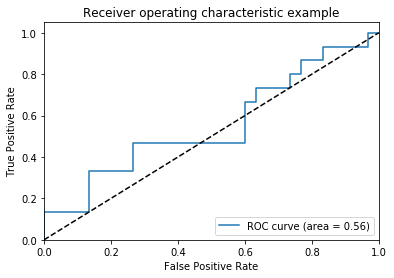

In [141]:
#Prediction of the model
temp = Y_test.copy()
for i in range(len(Y_test)):
    if Y_test[i] != 0: temp[i] = -1
    else: temp[i] = 1

fpr, tpr, thresholds = roc_curve(temp, scores)
roc_auc = auc(fpr, tpr)
print(fpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(y_score, y_test)
# Compute ROC curve and ROC area for each class
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
for i in range(n_classes):
    print(y_score[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#fpr, tpr, _ = roc_curve(, y_score[:, i])
#roc_auc = auc(fpr, tpr)
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[[-0.76301132 -0.36482547  0.12386354]
 [-0.20224493 -0.63144366 -0.16612302]
 [ 0.11801481 -0.80263073 -0.32055874]
 [-0.90780855 -0.12395478  0.02199789]
 [-0.01116192 -0.27913475 -0.71889214]
 [-0.6048727  -0.34730509 -0.05859016]
 [ 0.02283491 -0.24506467 -0.79111998]
 [-0.61076876  0.18264917 -0.57199363]
 [-0.37572754 -0.24059516 -0.38933694]
 [-0.47017411 -0.25745136 -0.27510839]
 [-0.42224234 -0.30270719 -0.27995197]
 [-0.3355867  -0.7030665   0.02530178]
 [-0.22723929 -0.64062258 -0.13456902]
 [-0.07856729 -0.46354017 -0.45918364]
 [-0.53383361 -0.2653183  -0.20023832]
 [ 0.12163662 -0.56706353 -0.56980985]
 [-0.71356947 -0.04226738 -0.24297128]
 [-0.55111511 -0.13784913 -0.31370595]
 [ 0.37991331 -0.99673302 -0.39090964]
 [-0.11107635 -0.91349462  0.03129167]
 [-0.70713712 -0.06436533 -0.21423788]
 [-0.02392675 -0.45906496 -0.51922684]
 [-0.25045747 -0.80086123  0.04121338]
 [ 0.12675547 -0.70985659 -0.41072849]
 [-0.68210402 -0.20735021 -0.12051204]
 [-0.08001795 -0.36698232

ValueError: ignored